In [ ]:
# Run this notebook on colab. On local it may crash during training.
# Inspiration https://towardsdatascience.com/creating-word-embeddings-coding-the-word2vec-algorithm-in-python-using-deep-learning-b337d0ba17a8
# “dad” = [0.1548, 0.4848, …, 1.864]
# “mom” = [0.8785, 0.8974, …, 2.794]

# Embedding Process
# Read the text -> Preprocess text -> Create (x, y) data points -> Create one hot encoded (X, Y) matrices -> train a neural network -> extract the weights from the input layer

In [1]:
corpus = '''The future king is the prince
Daughter is the princess.
Son is the prince.
Only a man can be a king.
Only a woman can be a queen.
The princess will be a queen.
Queen and king rule the realm.
The prince is a strong man.
The princess is a beautiful woman.
The royal family is the king and queen and their children.
Prince is only a boy now.
A boy will be a man.'''

# Data Points 
# # Focus (X), Context Word (Y)
# (The, future), (The, king), 
# (future, the), (future, king), (future, is)
# (king, the), (king, future), (king, is), (king, the)
# (is, future), (is, king), (is, the), (is, prince),
# (the, king), (the, is), (the, prince)
# (prince, is), (prince, the)



In [2]:
import re

def clean_text(
    string: str, 
    punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~''',
    stop_words=['the', 'a', 'and', 'is', 'be', 'will']) -> str:
    """
    A method to clean text 
    """
    # Cleaning the urls
    string = re.sub(r'https?://\S+|www\.\S+', '', string)

    # Cleaning the html elements
    string = re.sub(r'<.*?>', '', string)

    # Removing the punctuations
    for x in string.lower(): 
        if x in punctuations: 
            string = string.replace(x, "") 

    # Converting the text to lower
    string = string.lower()

    # Removing stop words
    string = ' '.join([word for word in string.split() if word not in stop_words])

    # Cleaning the whitespaces
    string = re.sub(r'\s+', ' ', string).strip()

    return string        

In [3]:
texts= corpus.split('\n')
texts

['The future king is the prince',
 'Daughter is the princess.',
 'Son is the prince.',
 'Only a man can be a king.',
 'Only a woman can be a queen.',
 'The princess will be a queen.',
 'Queen and king rule the realm.',
 'The prince is a strong man.',
 'The princess is a beautiful woman.',
 'The royal family is the king and queen and their children.',
 'Prince is only a boy now.',
 'A boy will be a man.']

In [4]:
text_clean=[]
for text in texts:
    text_clean.append( clean_text(text))


In [5]:
text1=[]
for text in text_clean:
    text1.append (text.split())

In [6]:
# Defining the window for context
window = 2

# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []

for text in text1:
    # Cleaning the text
    #text = text_preprocessing(text)

    # Appending to the all text list
    all_text += text 

    # Creating a context dictionary
    for i, word in enumerate(text):

        for w in range(window):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text): 
                word_lists.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words    
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])

In [7]:
word_lists

[['future', 'king'],
 ['future', 'prince'],
 ['king', 'prince'],
 ['king', 'future'],
 ['prince', 'king'],
 ['prince', 'future'],
 ['daughter', 'princess'],
 ['princess', 'daughter'],
 ['son', 'prince'],
 ['prince', 'son'],
 ['only', 'man'],
 ['only', 'can'],
 ['man', 'can'],
 ['man', 'only'],
 ['man', 'king'],
 ['can', 'king'],
 ['can', 'man'],
 ['can', 'only'],
 ['king', 'can'],
 ['king', 'man'],
 ['only', 'woman'],
 ['only', 'can'],
 ['woman', 'can'],
 ['woman', 'only'],
 ['woman', 'queen'],
 ['can', 'queen'],
 ['can', 'woman'],
 ['can', 'only'],
 ['queen', 'can'],
 ['queen', 'woman'],
 ['princess', 'queen'],
 ['queen', 'princess'],
 ['queen', 'king'],
 ['queen', 'rule'],
 ['king', 'rule'],
 ['king', 'queen'],
 ['king', 'realm'],
 ['rule', 'realm'],
 ['rule', 'king'],
 ['rule', 'queen'],
 ['realm', 'rule'],
 ['realm', 'king'],
 ['prince', 'strong'],
 ['prince', 'man'],
 ['strong', 'man'],
 ['strong', 'prince'],
 ['man', 'strong'],
 ['man', 'prince'],
 ['princess', 'beautiful'],
 ['p

In [8]:
def create_unique_word_dict(text:list) -> dict:
    """
    A method that creates a dictionary where the keys are unique words
    and key values are indices
    """
    # Getting all the unique words from our text and sorting them alphabetically
    words = list(set(text))
    words.sort()

    # Creating the dictionary for the unique words
    unique_word_dict = {}
    for i, word in enumerate(words):
        unique_word_dict.update({
            word: i
        })

    return unique_word_dict 

In [9]:
unique_word_dict = create_unique_word_dict(all_text)

In [10]:
from scipy import sparse
import numpy as np
import tqdm

# Defining the number of features (unique words)
n_words = len(unique_word_dict)

# Getting all the unique words 
words = list(unique_word_dict.keys())

# Creating the X and Y matrices using one hot encoding
X = []
Y = []

for i, word_list in enumerate(word_lists):
    # Getting the indices
    main_word_index = unique_word_dict.get(word_list[0])
    context_word_index = unique_word_dict.get(word_list[1])

    # Creating the placeholders   
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words 
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

# Converting the matrices into an array
X = np.asarray(X)
Y = np.asarray(Y)

In [11]:
X.shape, Y.shape

((84, 21), (84, 21))

In [12]:
# Deep learning: 
from tensorflow.keras.models import Model
#from keras.models import Input, Model
from tensorflow.keras.layers import Dense, Input

# Defining the size of the embedding
embed_size = 2

# Defining the neural network
inp = Input(shape=(X.shape[1],))
x = Dense(units=embed_size, activation='linear')(inp)
x = Dense(units=Y.shape[1], activation='softmax')(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

# Optimizing the network weights
model.fit(
    x=X, 
    y=Y, 
    batch_size=256,
    epochs=1000
    )

# Obtaining the weights from the neural network. 
# These are the so called word embeddings

# The input layer 
weights = model.get_weights()[0]

# Creating a dictionary to store the embeddings in. The key is a unique word and 
# the value is the numeric vector
embedding_dict = {}
for word in words: 
    embedding_dict.update({
        word: weights[unique_word_dict.get(word)]
        })

Epoch 1/1000
1/1 [==============================] - 1s 550ms/step - loss: 3.0642
Epoch 2/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.0631
Epoch 3/1000
1/1 [==============================] - 0s 12ms/step - loss: 3.0620
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.0609
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.0598
Epoch 6/1000
1/1 [==============================] - 0s 13ms/step - loss: 3.0587
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.0576
Epoch 8/1000
1/1 [==============================] - 0s 15ms/step - loss: 3.0565
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.0554
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.0543
Epoch 11/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.0532
Epoch 12/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.0521
Epoch 13/1000
1/1 [=========================

In [14]:
embedding_dict

{'beautiful': array([ 0.55854726, -1.5069765 ], dtype=float32),
 'boy': array([1.0414466, 0.7166229], dtype=float32),
 'can': array([-0.44648644,  0.24486254], dtype=float32),
 'children': array([-0.4867859, -1.2891239], dtype=float32),
 'daughter': array([-1.5306263, -1.6019387], dtype=float32),
 'family': array([-1.393941 , -0.2883304], dtype=float32),
 'future': array([-0.42262805,  0.45677453], dtype=float32),
 'king': array([-0.06875173, -0.5872966 ], dtype=float32),
 'man': array([-0.6186137,  1.0006516], dtype=float32),
 'now': array([-0.67071885,  1.321555  ], dtype=float32),
 'only': array([0.9443696 , 0.34717563], dtype=float32),
 'prince': array([-0.443464  ,  0.81060815], dtype=float32),
 'princess': array([ 1.2042435, -1.4235294], dtype=float32),
 'queen': array([-0.2525461, -1.3892314], dtype=float32),
 'realm': array([-0.704606 , -1.1854475], dtype=float32),
 'royal': array([-1.6372031, -1.21645  ], dtype=float32),
 'rule': array([-1.2945678, -0.8901628], dtype=float32),

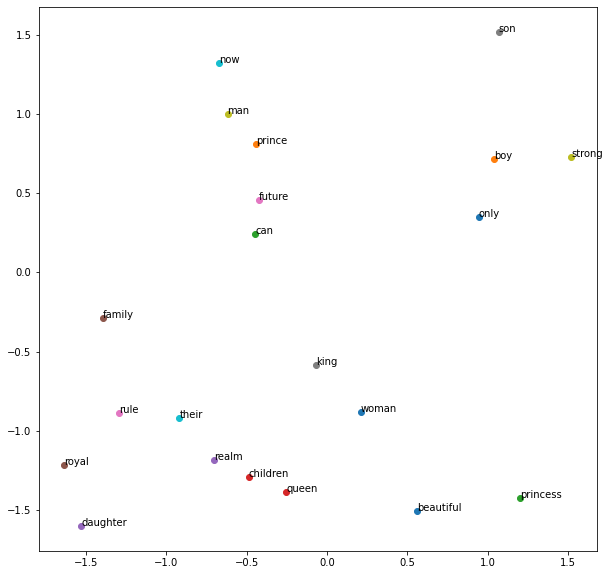

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for word in list(unique_word_dict.keys()):
  coord = embedding_dict.get(word)
  plt.scatter(coord[0], coord[1])
  plt.annotate(word, (coord[0], coord[1]))